# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# открываем файл
try:
    data = pd.read_csv('C:/Users/Student/Desktop/dataset.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
 
# выводим первые 20 строк
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего в датафрейме 23.699 строк. В большинстве столбцов есть пропуски. Кроме того необходимо изменить тип данных в ряде столбцов.

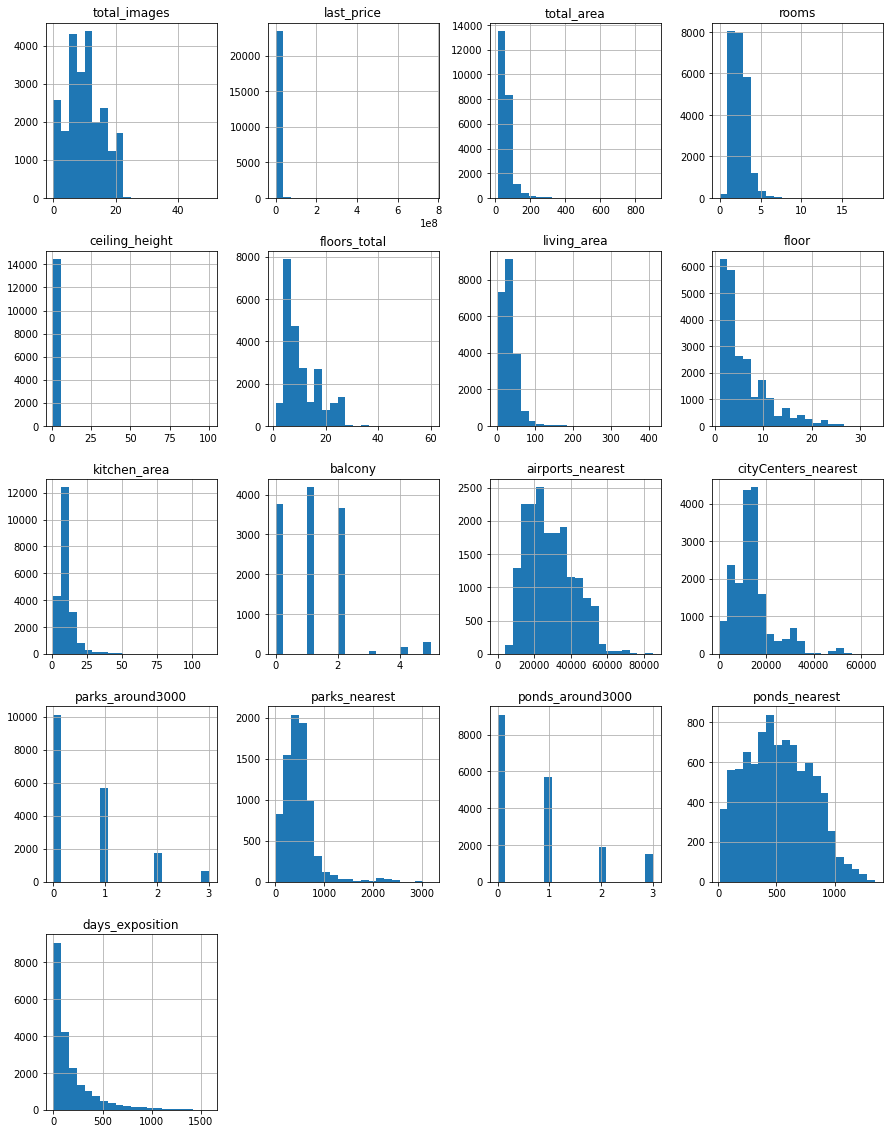

In [4]:
data.hist(bins=20, figsize=(15, 20))
plt.show()

На основании построенных гистограмм можно предположить, что есть аномальные значения. 
В частности, необходимо проверить следующие колонки: 

*last_price:* есть значения, близкие к нулю, и большие значения в 800.000.000 рублей;

*total_area:* есть значения, близкие к нулю и квартиры по 900 метров; 

*rooms:* есть значения, равные нулю, и квартиры с 20ью комнатами;

*ceiling_height:* есть квартиры с потолками в 100 метров;

*floors_total:* есть квартиры в домах с 60ью этажами;

*living_area:* есть значения, близкие к нулю, есть значения, близкие к 400 метрам;

*kitchen_area:* есть значения, близкие к нулю, и кухни более 100 метров;

*airports_nearest:* есть значения, равные нулю.

### Предобработка данных.

#### Найдем и изучим пропущенные значения в столбцах.

Для начала проверим данные на наличие дубликатов.

In [5]:
print('\nЧисло дубликатов:', data.duplicated().sum())


Число дубликатов: 0


Поменяем названия столбцов в соответствие с хорошим стилем.

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# переименовываем названия столбцов, где это необходимо
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', \
                            'ponds_around3000': 'ponds_around_3000'}) 

Выведем количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для пропущенных значений в столбце "is_apartment" логично предположить, что отсутствующая информация соответствует False.

In [9]:
data['is_apartment'].fillna(False, inplace=True) 

В столбце "balcony" продавец не указал число балконов. Скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [10]:
data['balcony'].fillna(0, inplace=True)  

Заполним пропуски в столбце "ceiling_height" медианным значением по каждому типу из столбца "rooms".

In [11]:
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == i), 'ceiling_height'].median()

Заполним пропуски в столбце "floors_total" медианным значением по каждому типу из столбца "ceiling_height".

In [12]:
for i in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == i) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['ceiling_height'] == i), 'floors_total'].median()

Заполним пропуски в столбце "living_area". Для этого найдем медиану отношения жилой площади к общей площади. Затем заполним отсутствующие значения жилой площади произведением медианы на общую площадь для заданной квартиры.  

In [13]:
ratio_living_total_median = (data['living_area'] / data['total_area']).median()

data.loc[data['living_area'].isna(), 'living_area'] = \
round(ratio_living_total_median * data.loc[data['living_area'].isna(), 'total_area'], 2)

Аналогично заполним пропуски в столбце "kitchen_area".

In [14]:
ratio_kitchen_total_median = (data['kitchen_area'] / data['total_area']).median()

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = \
round(ratio_kitchen_total_median * data.loc[data['kitchen_area'].isna(), 'total_area'], 2)

Заполним пропуски для столбца "parks_around_3000". Для начала посмотрим какие уникальные значения есть в этом столбце. 

In [15]:
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

Выполним замену отсутствующих значений на "0", т.к. отсутствие данных, вероятнее всего означает что на расстоянии 3км парков нет.

In [16]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

Заполним пропуски для столбца "ponds_around_3000". Для начала посмотрим какие уникальные значения есть в этом столбце.

In [17]:
data['ponds_around_3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

Выполним замену отсутствующих значений на "0", т.к. отсутствие данных, вероятнее всего означает что на расстоянии 3км водоёмов нет.

In [18]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

Еще раз выведем количество пропущенных значений.

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total                2
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

После заполнения пропущенных значений, где это было возможно, проверим какие строки можно удалить. Для этого напишем функцию, определяющую долю пропущенных строк в заданном столбце в процентах. Если доля будет меньше 5%, то удалим строки.

In [20]:
# функция, определяющая долю пропущенных строк:
def ratio_no_value(column):
    return print('Пропущено {:.1%}'. format(data[column].isna().value_counts()[1] / len(data)) + ' значений')

Доля пропущенных значений для столбца "ceiling_height":

In [21]:
ratio_no_value('ceiling_height')

Пропущено 0.7% значений


Удаляем строки с пропущенными значениями в колонке "ceiling_height":

In [22]:
data = data.dropna(subset=['ceiling_height'])

Доля пропущенных значений для столбца "locality_name":

In [23]:
ratio_no_value('locality_name')

Пропущено 0.1% значений


Удаляем строки с пропущенными значениями в колонке "locality_name":

In [24]:
data = data.dropna(subset=['locality_name'])

Доля пропущенных значений для столбца "airports_nearest":         

In [25]:
ratio_no_value('airports_nearest')

Пропущено 23.0% значений


Оставляем пропуски.

Доля пропущенных значений в столбцах "city_centers_nearest", "parks_nearest", "ponds_nearest", "days_exposition":

In [26]:
ratio_no_value('city_centers_nearest')
ratio_no_value('parks_nearest')
ratio_no_value('ponds_nearest')
ratio_no_value('days_exposition')

Пропущено 22.9% значений
Пропущено 65.7% значений
Пропущено 61.4% значений
Пропущено 13.4% значений


Оставляем пропуски.

Опишем причины из-за которых могли возникнуть пропуски. Пропущенных данных довольно много. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма получены автоматически на основе картографических данных. Пропуски в этих столбцах означают, что произошла ошибка при выгрузке данных. Другие пропуски могут быть связаны и с тем, что продавец не указал соответствующую информацию. Возможно эти данные не являются обязательными к заполнению. Пропуски в столбце "days_exposition" означают, что объявления были размещены, но не сняты с публикации и до сих пор актуальны. 

#### Рассмотрим типы данных в столбцах.

Найдем столбцы, в которых нужно изменить тип данных.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23529 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23529 non-null  int64  
 1   last_price            23529 non-null  float64
 2   total_area            23529 non-null  float64
 3   first_day_exposition  23529 non-null  object 
 4   rooms                 23529 non-null  int64  
 5   ceiling_height        23529 non-null  float64
 6   floors_total          23529 non-null  float64
 7   living_area           23529 non-null  float64
 8   floor                 23529 non-null  int64  
 9   is_apartment          23529 non-null  bool   
 10  studio                23529 non-null  bool   
 11  open_plan             23529 non-null  bool   
 12  kitchen_area          23529 non-null  float64
 13  balcony               23529 non-null  float64
 14  locality_name         23529 non-null  object 
 15  airports_nearest   

Приведём формат вывода даты и времени по столбцу "first_day_exposition" к формату DateTime:

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Значения в колонках "floors_total", "balcony", "parks_around3000", "ponds_around_3000" поменяем на целочисленные:

In [29]:
data[['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'last_price']] = \
data[['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'last_price']].astype(int)

Заменим тип данных float64 на float32.

In [30]:
# выбираем колонки
float64_cols = list(data.select_dtypes(include='float64'))

# меняем тип данных
data[float64_cols] = data[float64_cols].astype('float32')

Проверим изменения данных.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23529 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23529 non-null  int64         
 1   last_price            23529 non-null  int64         
 2   total_area            23529 non-null  float32       
 3   first_day_exposition  23529 non-null  datetime64[ns]
 4   rooms                 23529 non-null  int64         
 5   ceiling_height        23529 non-null  float32       
 6   floors_total          23529 non-null  int64         
 7   living_area           23529 non-null  float32       
 8   floor                 23529 non-null  int64         
 9   is_apartment          23529 non-null  bool          
 10  studio                23529 non-null  bool          
 11  open_plan             23529 non-null  bool          
 12  kitchen_area          23529 non-null  float32       
 13  balcony         

Типы данных необходимо менять в связи с тем, что с разными данными необходимо по-разному работать. Например, преобразование столбца "first_day_exposition" в тип данных DateTime позволяет легко выполнять операции, связанные с датой, например, находить все строки за указанный период времени. Преобразование столбцов в int сделано для удобства. Понятно, что количество балконов, этажей, парков и водоемов является целочисленным значением.

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

Посчитаем количество уникальных названий в столбце "locality_name".

In [32]:
len(data['locality_name'].unique())

283

Изучим уникальные названия в столбце "locality_name".

In [33]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Изменим 'поселок' на 'посёлок' и устраним таким образом часть неявных дубликатов.

In [34]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'].sort_values().unique() # еще раз выведем уникальные названия

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

Устраним оставшиеся неявные дубликаты.

In [35]:
data['locality_name'] = \
data['locality_name'].replace('посёлок при железнодорожной станции Вещево','посёлок станции Вещево')
data['locality_name'] = \
data['locality_name'].replace('посёлок при железнодорожной станции Приветнинское','посёлок станции Приветнинское') 
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Большая Ижора','посёлок городского типа Большая Ижора')
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Лесогорский','посёлок городского типа Лесогорский')
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Мга','посёлок городского типа Мга')
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Назия','посёлок городского типа Назия')
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Павлово','посёлок городского типа Павлово')
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Рощино','посёлок городского типа Рощино')
data['locality_name'] = \
data['locality_name'].replace('городской посёлок Советский','посёлок городского типа Советский')
data['locality_name'] = \
data['locality_name'].replace('посёлок Рябово','посёлок городского типа Рябово') 
data['locality_name'] = data['locality_name'].replace('Любань','посёлок Любань')
data['locality_name'] = data['locality_name'].replace('Мурино','посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('Никольское','село Никольское')
data['locality_name'] = data['locality_name'].replace('Кудрово','деревня Кудрово')

# приведем значения к нижнему регистру для избавления от дубликатов
data['locality_name'] = data['locality_name'].str.lower() 
# еще раз посчитаем количество уникальных названий
len(data['locality_name'].unique()) 

248

#### Найдем и устраним редкие и выбивающиеся значения.

На основании построенной гистограммы в начале исследования было видно, что в столбце "last_price" были значения, близкие к нулю. Посмотрим на эти значения.

In [36]:
data['last_price'].sort_values()            

8793         12190
17456       430000
16219       450000
5698        450000
21912       470000
           ...    
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, Length: 23529, dtype: int64

Удалим строку со значение 12190.

In [37]:
data = data[data['last_price'] != 12190]

Для столбца "total_area" посмотрим числовые значения.

In [38]:
data['total_area'].describe()

count    23528.000000
mean        60.386848
std         35.729172
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Минимальное значение общей площади в 12 метров не является правдоподобным. Посмотрим сколько всего значений общей площади менее 20 метров.

In [39]:
data.query('total_area < 20')['total_area'].count()

27

Удалим квартиры с общей площадью меньше 20 метров.

In [40]:
data = data[data['total_area'] >= 20]

Для столбца "rooms" посмотрим уникальные значения в этом столбце. 

In [41]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

Посмотрим квартиры с количеством комнат, равных 0.

In [42]:
data.query('rooms == 0')['rooms'].count() # посчитаем количество таких квартир

187

In [43]:
pd.set_option('display.max_columns', 22)
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27.000000,2017-03-30,0,2.70,24,15.500000,2,False,True,False,4.66,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000,25.000000,2017-09-27,0,2.75,14,17.000000,1,False,False,True,4.31,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000,27.110001,2018-03-12,0,2.70,17,24.750000,4,False,True,False,4.67,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000,34.400002,2017-03-28,0,2.64,26,24.299999,19,False,False,True,5.93,1,посёлок парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000,25.000000,2019-02-20,0,2.63,10,14.200000,7,False,True,False,4.31,0,посёлок шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000,24.100000,2017-12-01,0,2.75,25,17.500000,21,False,True,False,4.16,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,201.0
780,9,2600000,26.100000,2018-02-20,0,2.70,18,14.820000,8,False,False,True,4.50,1,посёлок мурино,NaN,NaN,0,NaN,0,NaN,45.0
839,14,1900000,35.000000,2017-04-14,0,2.70,5,15.000000,3,False,False,True,6.03,1,посёлок новый свет,NaN,NaN,0,NaN,0,NaN,7.0
946,5,2200000,23.000000,2016-09-27,0,2.70,27,18.000000,7,False,False,True,3.97,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,483.0
1173,12,3240000,29.000000,2018-10-30,0,2.70,24,17.000000,2,False,True,False,5.00,2,санкт-петербург,35129.0,16293.0,0,NaN,1,475.0,13.0


Логично предположить, что квартиры с 0 комнат являются студиями. Такие строки следует оставить. Однако есть квартриры, не являющиеся студиями, и с нулевым количеством комнат. Посчитаем их.

In [44]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False), 'rooms'].count()

57

Таких квартир всего 58. Можно их удалить:

In [45]:
indexNames = data[(data['rooms'] == 0) & (data['studio'] == False)].index
data.drop(indexNames, inplace=True)

data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27.000000,2017-03-30,0,2.70,24,15.500000,2,False,True,False,4.66,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,181.0
440,8,2480000,27.110001,2018-03-12,0,2.70,17,24.750000,4,False,True,False,4.67,2,санкт-петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
608,2,1850000,25.000000,2019-02-20,0,2.63,10,14.200000,7,False,True,False,4.31,0,посёлок шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000,24.100000,2017-12-01,0,2.75,25,17.500000,21,False,True,False,4.16,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,201.0
1173,12,3240000,29.000000,2018-10-30,0,2.70,24,17.000000,2,False,True,False,5.00,2,санкт-петербург,35129.0,16293.0,0,NaN,1,475.0,13.0
1174,3,3900000,32.000000,2016-10-18,0,2.70,24,18.000000,2,False,True,False,5.52,2,санкт-петербург,44754.0,8409.0,1,609.0,0,NaN,540.0
1220,5,3300000,27.000000,2017-11-10,0,2.80,17,20.000000,16,False,True,False,4.66,0,санкт-петербург,12507.0,12419.0,0,NaN,1,528.0,113.0
1260,0,2600000,27.000000,2018-07-20,0,2.70,16,16.000000,4,False,True,False,4.66,2,деревня кудрово,NaN,NaN,0,NaN,0,NaN,102.0
1277,10,3150000,26.000000,2017-07-14,0,2.75,21,17.379999,11,False,True,False,4.48,0,санкт-петербург,48847.0,16685.0,0,NaN,0,NaN,622.0
1528,8,1950000,31.000000,2019-01-29,0,2.56,18,18.000000,11,False,True,False,5.34,2,село никольское,NaN,NaN,0,NaN,0,NaN,NaN


Для столбца "ceiling_height" посмотрим уникальные значения.        

In [46]:
data['ceiling_height'].sort_values().unique()

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.515,   2.52 ,   2.525,   2.53 ,   2.54 ,
         2.55 ,   2.555,   2.56 ,   2.57 ,   2.575,   2.58 ,   2.59 ,
         2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,   2.63 ,   2.64 ,
         2.65 ,   2.66 ,   2.67 ,   2.675,   2.68 ,   2.69 ,   2.7  ,
         2.71 ,   2.72 ,   2.725,   2.73 ,   2.74 ,   2.75 ,   2.76 ,
         2.77 ,   2.78 ,   2.79 ,   2.8  ,   2.81 ,   2.82 ,   2.83 ,
         2.84 ,   2.85 ,   2.86 ,   2.87 ,   2.88 ,   2.89 ,   2.9  ,
         2.91 ,   2.92 ,   2.93 ,   2.94 ,   2.95 ,   2.96 ,   2.97 ,
         2.98 ,   2.99 ,   3.   ,   3.01 ,   3.02 ,   3.03 ,   3.04 ,
         3.05 ,   3.06 ,   3.07 ,   3.08 ,   3.09 ,   3.1  ,   3.11 ,
         3.12 ,   3.13 ,   3.14 ,   3.15 ,   3.16 ,   3.17 ,   3.18 ,
         3.2  ,   3.21 ,   3.22 ,   3.23 ,   3.24 ,   3.25 ,   3.26 ,
         3.27 ,   3.

Можно увидеть потолки больше 20 метров и даже 100. Посмотрим сколько всего таких значений.

In [47]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'].count()

23

Логично предположить, что в этих значений просто пропущена запятая. Следовательно нужно поделить такие значения на 10.

In [48]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [49]:
data['ceiling_height'].sort_values().unique()

array([ 1.   ,  1.2  ,  1.75 ,  2.   ,  2.2  ,  2.25 ,  2.26 ,  2.3  ,
        2.34 ,  2.4  ,  2.45 ,  2.46 ,  2.47 ,  2.48 ,  2.49 ,  2.5  ,
        2.51 ,  2.515,  2.52 ,  2.525,  2.53 ,  2.54 ,  2.55 ,  2.555,
        2.56 ,  2.57 ,  2.575,  2.58 ,  2.59 ,  2.6  ,  2.61 ,  2.615,
        2.62 ,  2.625,  2.63 ,  2.64 ,  2.65 ,  2.66 ,  2.67 ,  2.675,
        2.68 ,  2.69 ,  2.7  ,  2.71 ,  2.72 ,  2.725,  2.73 ,  2.74 ,
        2.75 ,  2.76 ,  2.77 ,  2.78 ,  2.79 ,  2.8  ,  2.81 ,  2.82 ,
        2.83 ,  2.84 ,  2.85 ,  2.86 ,  2.87 ,  2.88 ,  2.89 ,  2.9  ,
        2.91 ,  2.92 ,  2.93 ,  2.94 ,  2.95 ,  2.96 ,  2.97 ,  2.98 ,
        2.99 ,  3.   ,  3.01 ,  3.02 ,  3.03 ,  3.04 ,  3.05 ,  3.06 ,
        3.07 ,  3.08 ,  3.09 ,  3.1  ,  3.11 ,  3.12 ,  3.13 ,  3.14 ,
        3.15 ,  3.16 ,  3.17 ,  3.18 ,  3.2  ,  3.21 ,  3.22 ,  3.23 ,
        3.24 ,  3.25 ,  3.26 ,  3.27 ,  3.28 ,  3.29 ,  3.3  ,  3.31 ,
        3.32 ,  3.33 ,  3.34 ,  3.35 ,  3.36 ,  3.37 ,  3.38 ,  3.39 ,
      

Потолков ниже 2 метров быть не может. Посчитаем сколько всего таких квартир.

In [50]:
data.query('ceiling_height < 2')['ceiling_height'].count()

3

Удалим эти квартиры.

In [51]:
data = data[data['ceiling_height'] > 2]

Для столбца "airports_nearest" посмотрим числовые значения.

In [52]:
data['airports_nearest'].describe()

count    18053.000000
mean     28813.212891
std      12637.636719
min          0.000000
25%      18576.000000
50%      26766.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Посмотрим квартиры, в которых расстояние до аэропорта равно нулю.

In [53]:
data.query('airports_nearest == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000,34.700001,2018-09-23,1,2.7,9,19.799999,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0


Такая квартира всего одна. И находится она в Санкт-Петербурге. Удалим эту строку. 

In [54]:
data = data[data['airports_nearest'] != 0]

На основании проведенной предобработки данных по выявлению редких и выбивающихся значений можно предположить, что причиной таких значений стал человеческий фактор, ошибки возникли при заполнении объявлений самими продавцами. Однако, значение расстояния до аэропорта, равное нулю, является ошибкой при выгрузке данных.

### Посчитайте и добавьте в таблицу новые столбцы.

#### Добавляем столбец "цена одного квадратного метра".

In [55]:
data['price_one_square_meter'] = round(data['last_price'] / data['total_area'], 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000,40.400002,2018-12-04,1,2.63,11,18.600000,1,False,False,...,11.00,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000,56.000000,2015-08-20,2,2.70,5,34.299999,4,False,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000,159.000000,2015-07-24,3,2.70,14,90.290001,9,False,False,...,27.41,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


#### Добавляем столбцы "день недели публикации объявления" , "месяц публикации объявления", "год публикации объявления".

 

In [56]:
# Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.400002,2018-12-04,1,2.63,11,18.600000,1,False,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.000000,2015-08-20,2,2.70,5,34.299999,4,False,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.000000,2015-07-24,3,2.70,14,90.290001,9,False,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


#### Добавляем столбец "тип этажа квартиры".


In [57]:
# Функция для категоризации этажности в доме
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [58]:
# Добавляем столбец с категорией этажа квартиры
data['floor_category'] = data.apply(get_floor_category, axis=1)

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.400002,2018-12-04,1,2.63,11,18.600000,1,False,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.000000,2015-08-20,2,2.70,5,34.299999,4,False,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.000000,2015-07-24,3,2.70,14,90.290001,9,False,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000,30.400000,2018-09-10,1,2.60,12,14.400000,5,False,False,...,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000,37.299999,2017-11-02,1,2.64,26,10.600000,6,False,False,...,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000,71.599998,2019-04-18,2,2.70,24,40.660000,22,False,False,...,11634.0,0,NaN,0,NaN,NaN,110544.70,3,4,2019,другой
8,20,2900000,33.160000,2018-05-23,1,2.70,27,15.430000,26,False,False,...,NaN,0,NaN,0,NaN,189.0,87454.77,2,5,2018,другой
9,18,5400000,61.000000,2017-02-26,3,2.50,9,43.599998,7,False,False,...,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой


#### Добавляем столбец "расстояние до центра города в километрах".

In [59]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.400002,2018-12-04,1,2.63,11,18.600000,1,False,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.000000,2015-08-20,2,2.70,5,34.299999,4,False,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.000000,2015-07-24,3,2.70,14,90.290001,9,False,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных.

#### Изучим параметры объектов.


##### Общая площадь.

Посмотрим числовые значения для данного столбца.

In [60]:
data['total_area'].describe()

count    23428.000000
mean        60.511654
std         35.674519
min         20.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Среднее значение равно 60 кв.м. А медиана 52 кв.м.

Построим диаграмму размаха, показывающую значения, которые сильно отличаются от типичных значений.

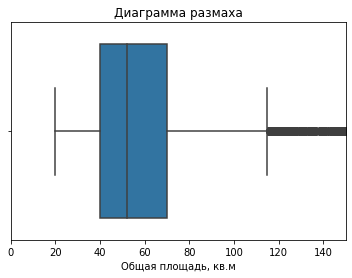

In [61]:
sns.boxplot(data['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)
plt.show()

Из диаграммы видно, что нормальные значения находятся в пределах до 120 кв.м. Добавим столбец с признаком, описывающим аномально большую площадь недвижимости. Нам это понадобится для дальнейшего анализа.

In [62]:
data['too_large_total'] = data['total_area'] > 120

Построим гистограмму распределения предложений квартир по общей площади, исключая выбросы.

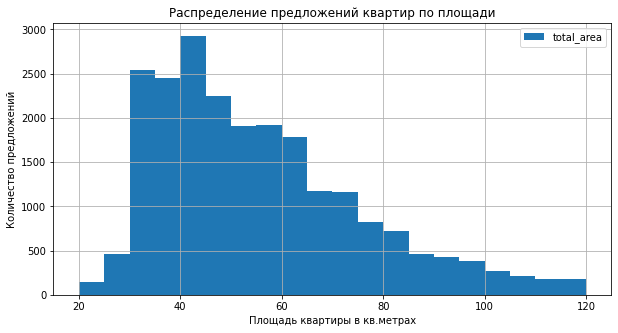

In [63]:
data.plot(kind='hist', y='total_area', title='Распределение предложений квартир по площади', 
              bins=20, range = (20, 120), figsize=(10,5), grid=True)

plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Больше всего предложений квартир с общей площадью от 30 до 50 кв.м. Самый распространенный вариант - 40 кв.м. Квартиры общей площадью до 30 кв.м. и более 100 кв.м. самые редкие варианты. 

##### Жилая площадь.

In [64]:
data['living_area'].describe()

count    23428.000000
mean        34.658688
std         22.373030
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200001
max        409.700012
Name: living_area, dtype: float64

Построим диаграмму размаха.

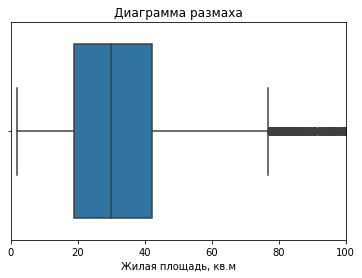

In [65]:
sns.boxplot(data['living_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Жилая площадь, кв.м')
plt.xlim(0, 100)
plt.show()

Нормальные значения находятся в пределах до 80 кв.м. Создадим стобец, показывающий наличие аномальной жилой площади.

In [66]:
data['too_large_living'] = data['living_area'] > 80

Построим гистограмму распределения предложений квартир по жилой площади.

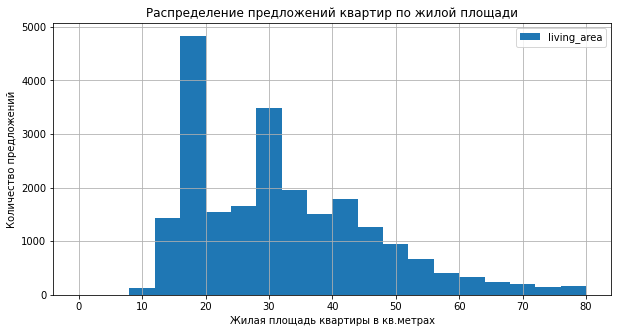

In [67]:
data.plot(kind='hist', y='living_area', title='Распределение предложений квартир по жилой площади', 
          bins=20, range = (0, 80), figsize=(10,5), grid=True)

plt.xlabel('Жилая площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Самый распространенный вариант квартир с жилой площадью от 15 до 20 кв.м. Так же часто встречаются варианты с жилой площадью около 30 кв.м. Квартиры с жилой площадью до 10 и от 70 кв.м. встречаются редко.

##### Площадь кухни.

In [68]:
data['kitchen_area'].describe()

count    23428.000000
mean        10.520201
std          6.023560
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Построим диаграмму размаха.

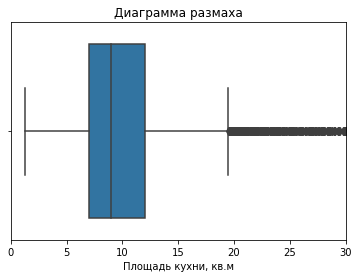

In [69]:
sns.boxplot(data['kitchen_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Площадь кухни, кв.м')
plt.xlim(0, 30)
plt.show()

Нормальные значения находятся в пределах до 20 кв.м. Создадим стобец, показывающий наличие аномальной площади кухни.

In [70]:
data['too_large_kitchen'] = data['kitchen_area'] > 20

Построим гистограмму распределения предложений квартир по площади кухни.

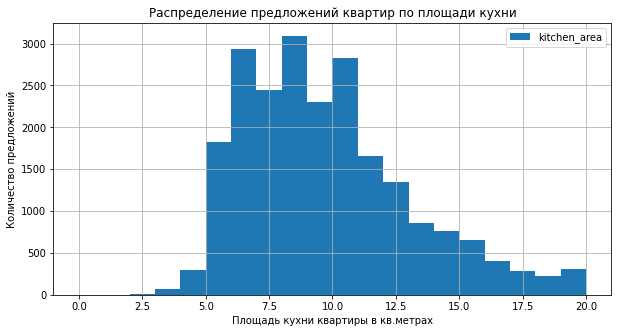

In [71]:
data.plot(kind='hist', y='kitchen_area', title='Распределение предложений квартир по площади кухни', 
          bins=20, range = (0, 20), figsize=(10,5), grid=True)

plt.xlabel('Площадь кухни квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Наиболее часто встречаются квартиры с кухнями в 6, 8 и 10 кв.м. Кухни до 5 и от 17 кв.м - редкие варианты. 

##### Цена объекта.

In [72]:
data['last_price'].describe()

count    2.342800e+04
mean     6.579579e+06
std      1.093080e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Средняя стоимость квартриры составляет 6.5 млн. рублей.

Построим диаграмму размаха.

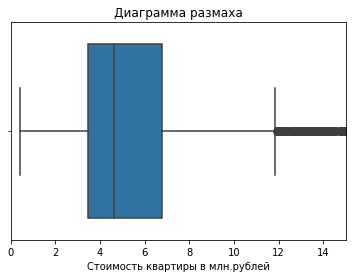

In [73]:
data['last_price_ml'] = data['last_price'] / 1000000 # для удобства поделим значения в колонке 'last_price' на 1 млн.
sns.boxplot(data['last_price_ml'])
plt.title('Диаграмма размаха')
plt.xlabel('Стоимость квартиры в млн.рублей')
plt.xlim(0, 15)
plt.show()

Нормальные значения находятся в пределах до 12 млн. рублей. Создадим стобец, показывающий наличие аномальной стоимости квартиры.

In [74]:
data['too_expensive'] = data['last_price'] > 12000000

Построим гистограмму распределения предложений квартир по стоимости, исключая выбросы.

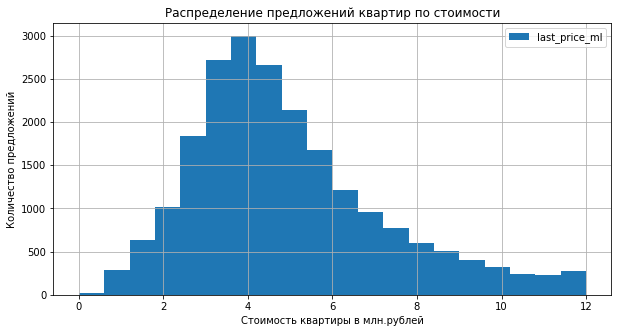

In [75]:

data.plot(kind='hist', y='last_price_ml', title='Распределение предложений квартир по стоимости', 
          bins=20, range = (0, 12), figsize=(10,5), grid=True)

plt.xlabel('Стоимость квартиры в млн.рублей')
plt.ylabel('Количество предложений')
plt.show()

Большинство объектов недвижимости имеют цену в пределах от 3.5 до 4.5 млн. рублей. При этом самый распространенный вариант - квартиры стоимостью в 4 млн. рублей. Варианты до 500.000 рублей и от 10 млн. рублей редки.

##### Количество комнат.

Построим диаграмму размаха.

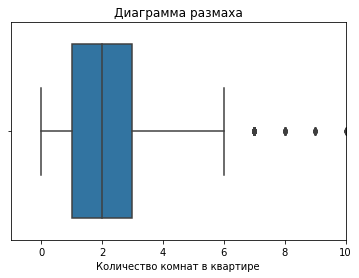

In [76]:
sns.boxplot(data['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Количество комнат в квартире')
plt.xlim(-1, 10)
plt.show()

Нормальные значения находятся в пределах до 6 комнат. Создадим стобец, показывающий наличие аномальных значений количества комнат.

In [77]:
data['too_much_rooms'] = data['rooms'] > 6

Построим гистограмму распределения предложений квартир по количеству комнат, исключая выбросы.

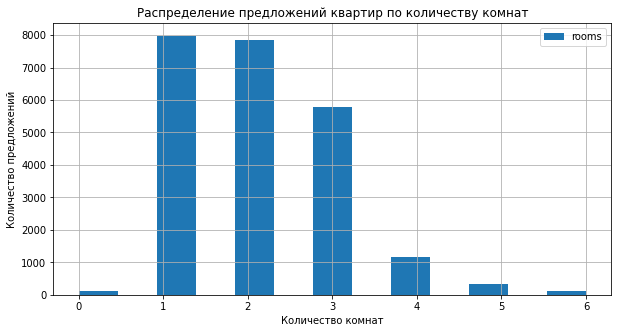

In [78]:
data.plot(kind='hist', y='rooms', title='Распределение предложений квартир по количеству комнат', 
          bins=13, range = (0, 6), figsize=(10,5), grid=True)

plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

Самые распространенные варианты квартир с 1 и 2 комнатами, а также с 3 комнатами в меньшем количестве. 

##### Высота потолков.

Построим диаграмму размаха.

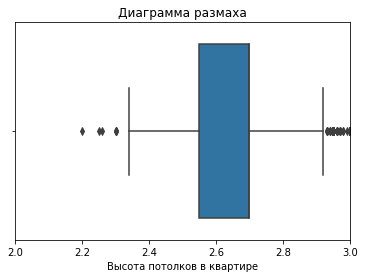

In [79]:
sns.boxplot(data['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков в квартире')
plt.xlim(2, 3)
plt.show()

Нормальные значения находятся в пределах до 2.4 и от 2.9 метров.

Построим гистограмму распределения предложений квартир по высоте потолков, исключая выбросы.

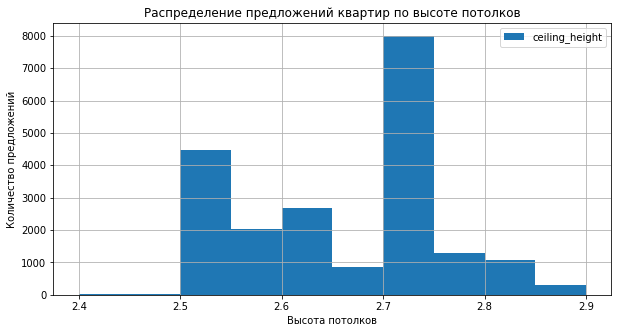

In [80]:
data.plot(kind='hist', y='ceiling_height', title='Распределение предложений квартир по высоте потолков',
          bins=10, range = (2.4, 2.9), figsize=(10,5), grid=True)

plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()

Наибольшее количество предложений квартир с потолками 2,6 метров.

##### Этаж квартиры.

Построим диаграмму размаха.

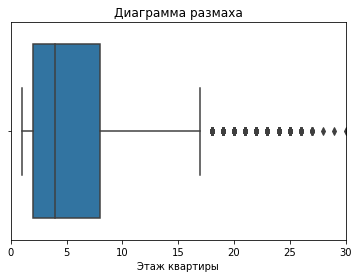

In [81]:
sns.boxplot(data['floor'])
plt.title('Диаграмма размаха')
plt.xlabel('Этаж квартиры')
plt.xlim(0, 30)
plt.show()

Нормальные значения находятся в пределах до 17 этажа.

Построим гистограмму распределения предложений квартир по этажам, исключая выбросы.

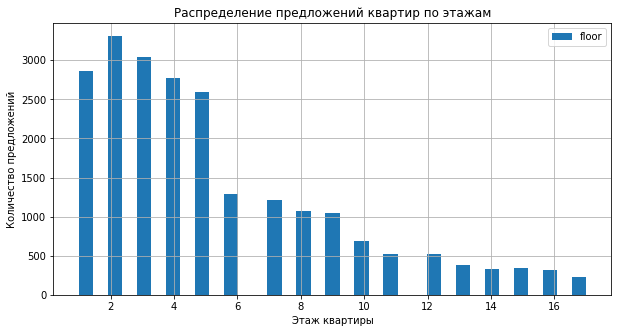

In [82]:
data.plot(kind='hist', y='floor', title='Распределение предложений квартир по этажам', 
          bins=35, range = (1, 17), figsize=(10,5), grid=True)

plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

Больше всего предложений квартир на этажах с 1ого по 5ый.

##### Тип этажа квартиры.

Посмотрим как квартиры распределены по категориям типа этажа.

In [83]:
data.value_counts(subset=['floor_category']) 

floor_category
другой            17286
последний          3284
первый             2858
dtype: int64

Меньше всего квартир в категории "первый этаж", больше всего предложений в категории "другой этаж".

##### Общее количество этажей в доме.

Построим диаграмму размаха.

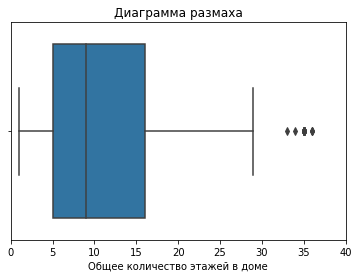

In [84]:
sns.boxplot(data['floors_total'])
plt.title('Диаграмма размаха')
plt.xlabel('Общее количество этажей в доме')
plt.xlim(0, 40)
plt.show()

Нормальные значения находятся в пределах до 30 этажа.

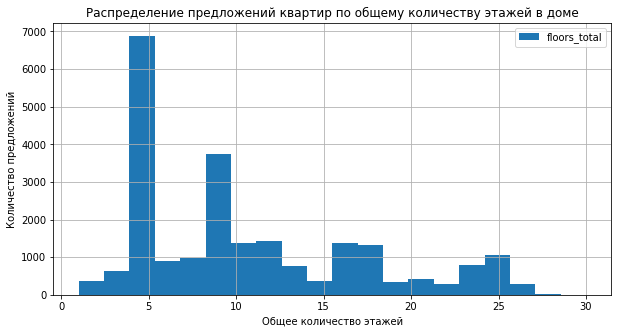

In [85]:
data.plot(kind='hist', y='floors_total', 
          title='Распределение предложений квартир по общему количеству этажей в доме', 
          bins=20, range = (1, 30), figsize=(10,5), grid=True)

plt.xlabel('Общее количество этажей')
plt.ylabel('Количество предложений')
plt.show()

Больше всего квартир в 5-этажных и 9-этажных домах.

##### Расстояние до центра города в метрах.

Построим диаграмму размаха.

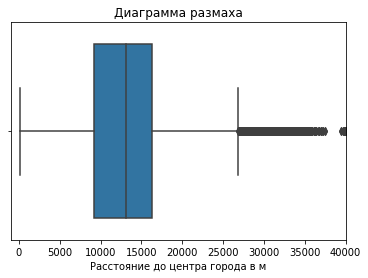

In [86]:
sns.boxplot(data['city_centers_nearest'])
plt.title('Диаграмма размаха')
plt.xlabel('Расстояние до центра города в м')
plt.xlim(-1000, 40000)
plt.show()

Нормальные значения находятся в пределах до 27.000 м. Создадим стобец, показывающий наличие аномальных значений в столбце 'city_centers_nearest'.

In [87]:
data['too_far_city_centers_nearest'] = data['city_centers_nearest'] > 27000

Построим гистограмму распределения предложений квартир по расстоянию до центра города, исключая выбросы.

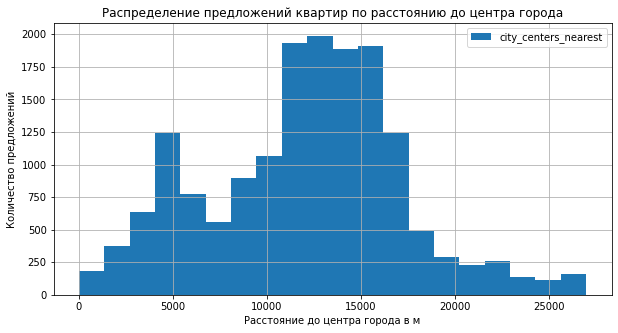

In [88]:
data.plot(kind='hist', y='city_centers_nearest', 
          title='Распределение предложений квартир по расстоянию до центра города', 
          bins=20, range = (0, 27000), figsize=(10,5), grid=True)

plt.xlabel('Расстояние до центра города в м')
plt.ylabel('Количество предложений')
plt.show()

Самые распространенные варианты квартир с расстоянием до центра города от 11.000 до 17.000 метров. Также распространен вариант в 5.000 метров. 

##### Расстояние до ближайшего аэропорта в метрах.


Построим диаграмму размаха.

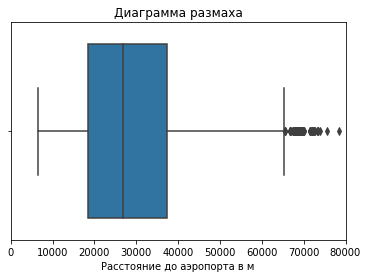

In [89]:
sns.boxplot(data['airports_nearest'])
plt.title('Диаграмма размаха')
plt.xlabel('Расстояние до аэропорта в м')
plt.xlim(0, 80000)
plt.show()

Нормальные значения находятся в пределах до 65.000 метров.

Построим гистограмму распределения предложений квартир по расстоянию до аэропорта, исключая выбросы.

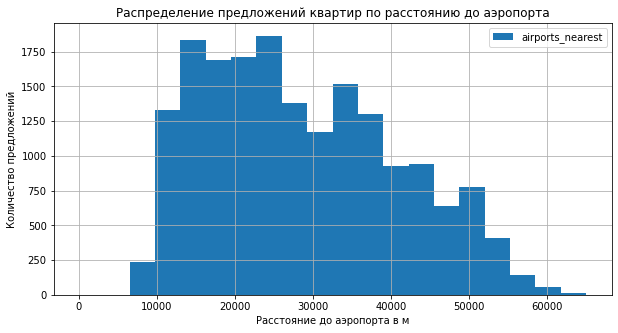

In [90]:
data.plot(kind='hist', y='airports_nearest', 
          title='Распределение предложений квартир по расстоянию до аэропорта', 
          bins=20, range = (0, 65000), figsize=(10,5), grid=True)

plt.xlabel('Расстояние до аэропорта в м')
plt.ylabel('Количество предложений')
plt.show()

Самые частые варианты квартир с расстоянием до аэропорта от 11.000 до 25.000 метров. Расстояния от 55.000 метров самые редкие.

##### Расстояние до ближайшего парка в метрах.

Построим диаграмму размаха.

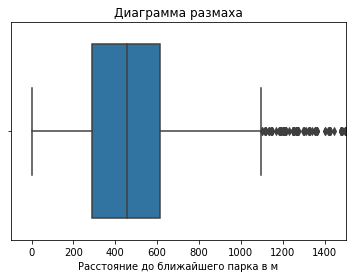

In [91]:
sns.boxplot(data['parks_nearest'])
plt.title('Диаграмма размаха')
plt.xlabel('Расстояние до ближайшего парка в м')
plt.xlim(-100, 1500)
plt.show()

Нормальные значения находятся в пределах до 1100 метров.

Построим гистограмму распределения предложений квартир по расстоянию до парка, исключая выбросы.

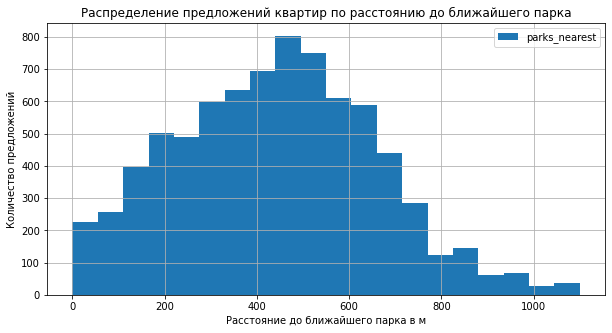

In [92]:
data.plot(kind='hist', y='parks_nearest', 
          title='Распределение предложений квартир по расстоянию до ближайшего парка', 
          bins=20, range = (0, 1100), figsize=(10,5), grid=True)

plt.xlabel('Расстояние до ближайшего парка в м')
plt.ylabel('Количество предложений')
plt.show()

Самый распространенный вариант - квартиры с расстояние до парка в 500 метров. Варианты от 1000 метров редки.

##### День публикации объявления.

Построим гистограмму распределения предложений квартир по дню публикации.

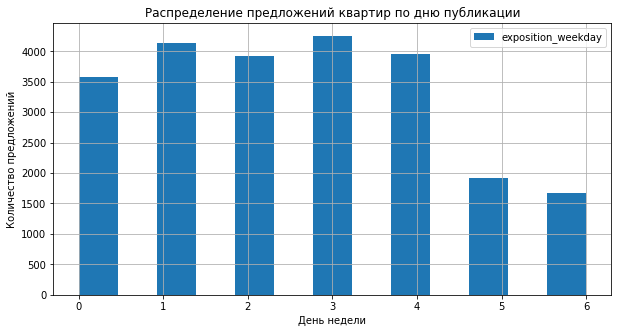

In [93]:
data.plot(kind='hist', y='exposition_weekday', 
          title='Распределение предложений квартир по дню публикации', 
          bins=13, figsize=(10,5), grid=True)

plt.xlabel('День недели')
plt.ylabel('Количество предложений')
plt.show()

Чаще всего объявления публикуются в будние дни.

##### Месяц публикации объявления.

Построим гистограмму распределения предложений квартир по месяцу публикации.

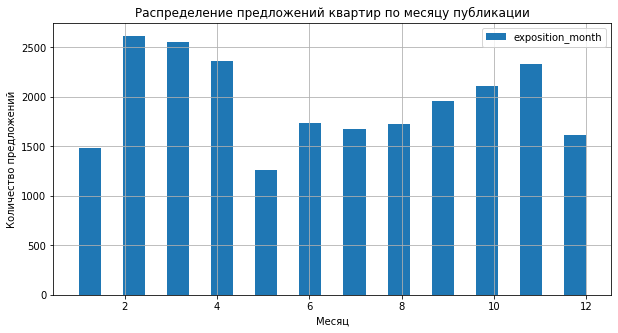

In [94]:
data.plot(kind='hist', y='exposition_month', title='Распределение предложений квартир по месяцу публикации', bins=23, figsize=(10,5), grid=True)

plt.xlabel('Месяц')
plt.ylabel('Количество предложений')
plt.show()

Чаще всего объявления публикуюся в период с февраля по апрель и с сентября по ноябрь. В мае наименьшее количество объявлений.

#### Как быстро продавались квартиры (столбец days_exposition).

Построим гистограмму распределения предложений квартир по количеству дней размещения объявления.

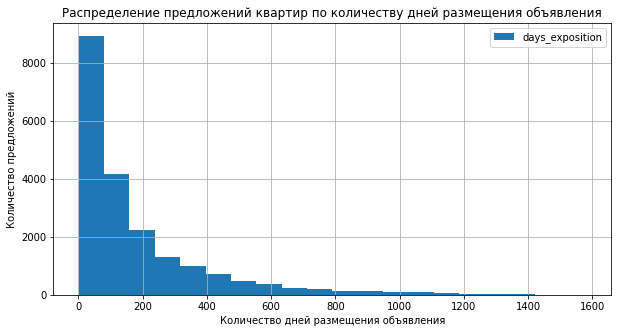

In [95]:
data.plot(kind='hist', y='days_exposition', 
          title='Распределение предложений квартир по количеству дней размещения объявления', 
          bins=20, figsize=(10,5), grid=True)

plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество предложений')
plt.show()

Чаще всего квартиры продаются за 200 дней. При этом пик таких значений приходится на 100 дней.

Посчитаем среднюю и медиану.

In [96]:
data['days_exposition'].agg(['mean','median'])

mean      181.448669
median     96.000000
Name: days_exposition, dtype: float64

Построим диаграмму размаха.

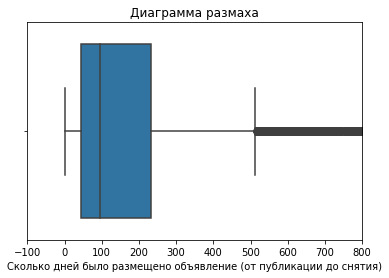

In [97]:
sns.boxplot(data['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.xlim(-100, 800)
plt.show()

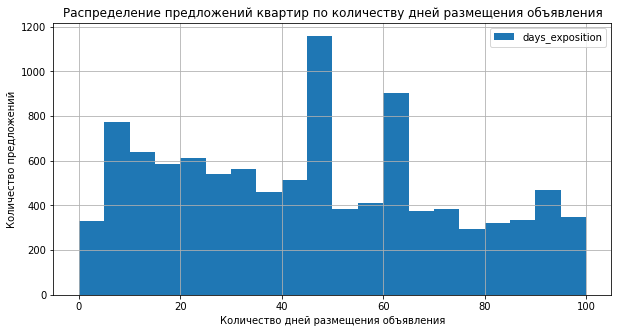

In [98]:
data.plot(kind='hist', y='days_exposition', 
          title='Распределение предложений квартир по количеству дней размещения объявления', 
          bins=20, range = (0, 100), figsize=(10,5), grid=True)

plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество предложений')
plt.show()

Согласно диаграмме размаха нормальные значения продажи квартир находятся в пределах от 50 до 250 дней. При этом продажи квартир менее, чем за 50 дней можно считать быстрыми. А более 500 дней можно считать необычайно долгими.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависит ли цена от общей площади, жилой площади и площади кухни?

Уберем редкие и выбивающиеся значения. Это необходимо для дальнейшего анализа.

In [99]:
good_data = data[(data['too_large_total'] == False) & 
    (data['too_large_living'] == False) &
    (data['too_large_kitchen'] == False) &
    (data['too_expensive'] == False) &
    (data['too_much_rooms'] == False) &
    (data['too_far_city_centers_nearest'] == False)].reset_index(drop=True)

Построим график зависимости цены от общей площади, жилой площади и площади кухни.

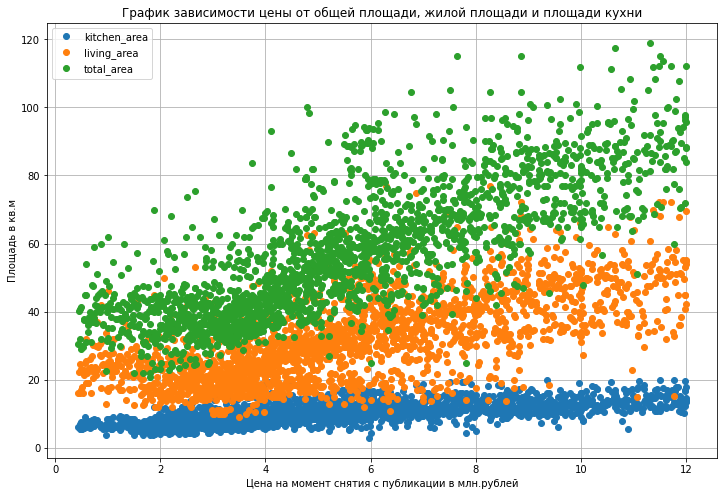

In [100]:
(good_data
    
     .pivot_table(index='last_price_ml', values=['total_area','living_area','kitchen_area'])
     .plot(style='o',grid=True, figsize=(12, 8), 
           title='График зависимости цены от общей площади, жилой площади и площади кухни')
)
plt.xlabel('Цена на момент снятия с публикации в млн.рублей')
plt.ylabel('Площадь в кв.м')
plt.show()

Посчитаем коэффициент корреляции для каждого из параметров.

In [101]:
round(good_data[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr(), 2)

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.70,0.58,0.51
total_area,0.70,1.00,0.92,0.48
living_area,0.58,0.92,1.00,0.22
kitchen_area,0.51,0.48,0.22,1.00


Как видно из графика все три параметра влияют на цену. Чем больше площадь, тем выше стоимость. При этом наибольшая зависимость цены связана с общей площадью, а наименьшая с площадью кухни. Это также подтверждается посчитанными коэффициентами корреляции. 

##### Зависит ли цена от количества комнат?

Построим график зависимости цены от количества комнат.

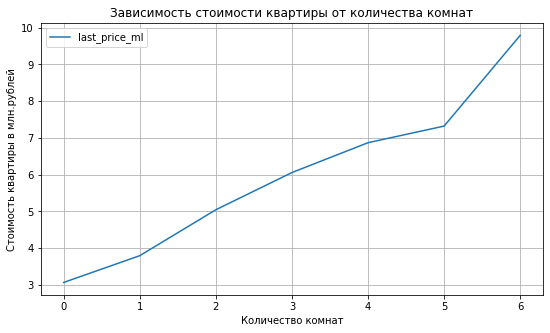

In [102]:
(good_data
     .pivot_table(index='rooms', values='last_price_ml').sort_values(by='last_price_ml', ascending=True)
     .plot(grid=True, figsize=(9, 5), title='Зависимость стоимости квартиры от количества комнат')
)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры в млн.рублей')
plt.show()

Цена растет плавно в соответствии с увеличением количества комнат. При этом пик роста приходится на значения с 5 до 6 комнат.

##### Зависит ли цена от категории этажа?

Построим график зависимости цены от категории этажа.

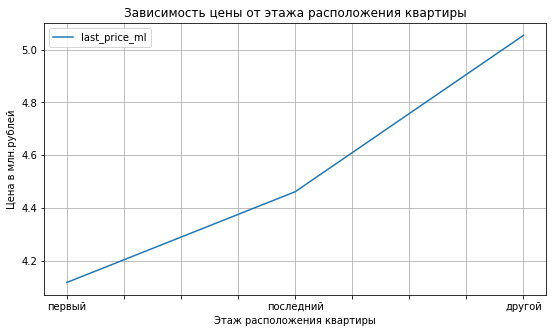

In [103]:
(good_data
     .pivot_table(index='floor_category', values='last_price_ml').sort_values(by='last_price_ml', ascending=True)
     .plot(grid=True, figsize=(9, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена в млн.рублей')
plt.show()

Самые дешевые квартиры располагаются на первом этаже. Средние по стоимости квартиры на последнем этаже. У квартир с категорией этажа "Другой" цены выше.

##### Зависит ли цена от даты размещения объявления?

Построим график зависимости цены от даты размещения объявления.

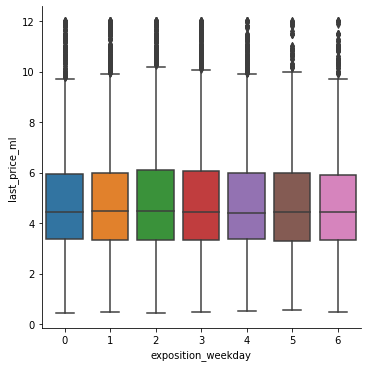

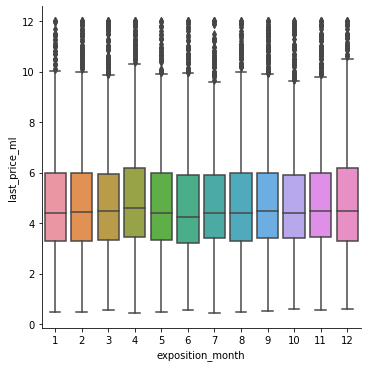

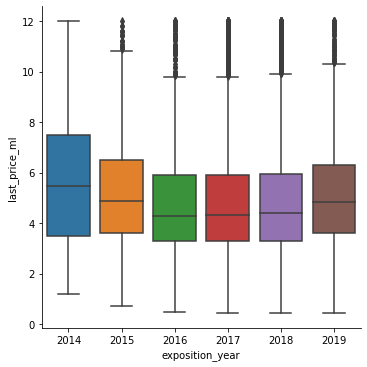

In [104]:
for column in ['exposition_weekday', 'exposition_month', 'exposition_year']:
    sns.catplot(x=column, y="last_price_ml", kind="box", data=good_data)

Зависимость цены от дня публикации не прослеживается. Зависимость цены от месяца публикации есть, но очень небольшая. По графику можно сказать, что в апреле цены чуть выше, а в июне ниже. А по годам зависимость более очевидна. Так в 2014 году цены были выше, затем упали, и стали расти в 2019 году.

#### 10 населённых пунктах с наибольшим числом объявлений. 

Найдем населенные пункты с наибольшим количеством объявлений и посчитаем среднюю цену для одного квадратного метра.

In [105]:
mean_price_one_square_meter = good_data.pivot_table(index='locality_name', 
                                                    values='price_one_square_meter', 
                                                    aggfunc=['count', 'mean'])
mean_price_one_square_meter.columns = ['count', 'mean']
mean_price_one_square_meter['mean'] = round(mean_price_one_square_meter['mean'], 3)
data_top_10 = mean_price_one_square_meter.sort_values('count', ascending=False).head(10)
data_top_10

,count,mean
locality_name,,
санкт-петербург,13384,105593.687
посёлок мурино,577,85994.774
деревня кудрово,438,95466.637
всеволожск,387,67103.699
посёлок парголово,321,90313.441
гатчина,300,68545.043
посёлок шушары,252,80930.962
выборг,222,58221.350
деревня новое девяткино,140,76168.286


Минимальная цена одного квадратного метра.

Посмотрим распределение объявлений по каждому из населенных пунктов на графике:

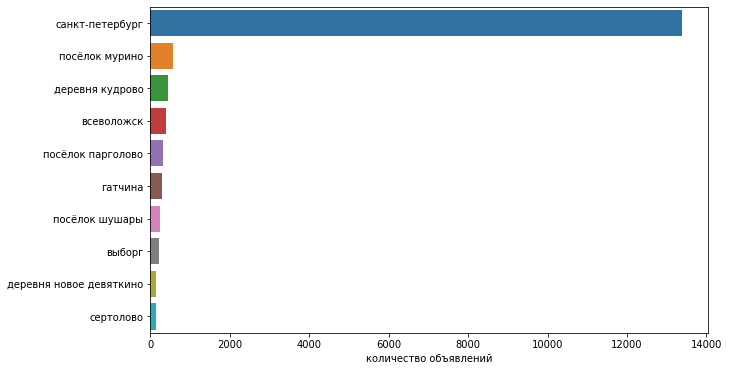

In [106]:
list = ['санкт-петербург', 'посёлок мурино', 'деревня кудрово', 'всеволожск', 'посёлок парголово', 'гатчина', 'посёлок шушары', 'выборг', 'деревня новое девяткино', 'сертолово']
plt.figure(figsize = (10,6))
sns.barplot(x='count', y=list, data=data_top_10)
plt.xlabel('количество объявлений')
plt.show()

In [107]:
data_top_10['mean'].min()

58221.35

Максимальная цена одного квадратного метра.

In [108]:
data_top_10['mean'].max()

105593.687

#### Как стоимость объектов зависит от расстояния до центра города Санкт-Петербурга.

Округлим значения в колонке 'city_centers_nearest_km' для выделения отдельных километров.

In [109]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest_km'])

Выделим только те квартиры, которые расположены в Санкт-Петербурге.

In [110]:
local_spb = good_data.loc[good_data['locality_name'] == 'санкт-петербург']

Посчитаем среднюю цену для каждого километра.

In [111]:
mean_price_one_km = local_spb.pivot_table(index='city_centers_nearest_km', values='price_one_square_meter', aggfunc='mean')
mean_price_one_km.columns = ['mean']
mean_price_one_km['mean'] = round(mean_price_one_km['mean'], 2)
mean_price_one_km.sort_values('mean', ascending=False).head(10)
mean_price_one_km.head()


,mean
city_centers_nearest_km,
0.0,121139.64
1.0,120806.30
2.0,117867.31
3.0,110530.16
4.0,116417.27


Построим график зависимости цены от удаленности от центра.

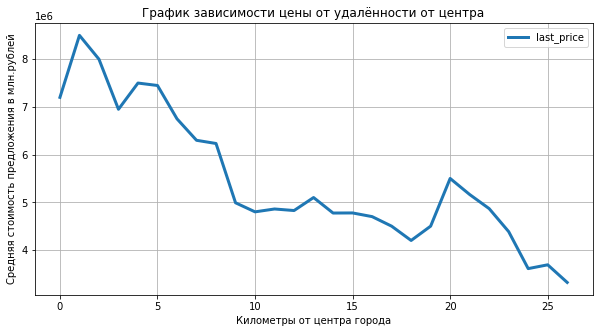

In [112]:
(
    local_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')
    .plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
)
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения в млн.рублей')
plt.show()

Посчитаем коэффициент корреляции.

In [113]:
round(local_spb['last_price'].corr(local_spb['city_centers_nearest_km']), 2)

-0.36

Очевидно, что падение цены на графике сильно изменилось при достижении значения в 9-10 км, это говорит нам, что центральным районом можно считать все квартиры в удалении от центра не более чем на 10 км. Чем дальше от центра города, тем в среднем квартира будет стоить дешевле. При этом на графике наблюдаются возрастание цен при значениях в 20 и 28 км. Возможно это квартиры, расположенные в более благоприятных районах, относительно остальных.

### Общий вывод.

Целью данного исследования была необходимость установить параметры для определения рыночной стоимости объектов недвижимости на основании архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, что позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

В ходе исследования были заполнены пропущенные значения, где это возможно, и выявлены редкие и выбивающиеся значения. Обозначим некоторые проблемы, которые были выявлены:

*Высота потолков.* 
Часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.). Необходимо добавить условие на ручной ввод: высота потолков не может быть двузначной величиной, а также меньше 2,4 м.

*Количество балконов.*
Пропущенные значения были заменены на 0, так как предполагается, что при отсутствии балконов, продавец не заполнял это поле. Необходимо сделать это условие обязательным к заполнению и дополнить выпадающим списком, который позволит пользователю выбрать нужное значение.

*Наименование населеного пункта.*
Были обнаружены неявные дубликаты. Необходимо добавить выпадающий список, который позволит пользователю выбрать необходимое наименование.

*Расстояние до центра, аэропорта, парка и водоема.*
В этих данных было много пропущенных значений. Эти значения заполнялись автоматически на основании картографических данных. Необходимо выяснить почему при выгрузке данных образовалось такое количество пропущенных значений.

Далее в ходе исследования были определены параметры, наиболее важные для определения рыночной стоимости объектов недвижимости:

*Общая площадь квартиры.*
Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,7).

*Расстояние до центра города (квартиры в Санкт-Петербурге).*
Коэффициент корреляции составил -0.36. Чем дальше от центра расположена квартира, тем ниже цена. Однако следует выделить некоторые районы, в которых цена выше по сравнению с другими, расположенными на таком же расстоянии от центра.

*Число комнат и этаж квартиры.*
Стоимость квартиры увеличивается по мере возрастания количества комнат. Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
